#By Raghunadh(IMT2021042),Kushal(IMT2021035),Chokshi(IMT2021012)

In [ ]:
import numpy as np
import pandas as pd
import urllib
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#Reading the files

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')
t = test_data
# X = dataset.iloc[:,0:8]
# Y = dataset.iloc[:,8:9]
# d = pd.concat([X,test_data],axis=0)
# print(X.shape)
# print(test_data.shape)
dataset

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day,Target
0,448131,377,788,34.2,ZL,UVZ,HZU,Thursday,0
1,240679,4225,1135,24.0,PB,FYJ,EGO,Wednesday,1
2,519288,6390,735,17.0,LL,VQD,VIR,Sunday,1
3,209857,2254,820,NaN,TK,ODV,EXU,Monday,1
4,34627,6322,855,15.8,LL,VIR,DFY,Monday,1
...,...,...,...,...,...,...,...,...,...
431500,463164,483,360,NaN,RP,GHQ,SKA,Monday,0
431501,341459,546,1008,7.4,EX,KQO,RJJ,Tuesday,0
431502,380981,1156,480,22.8,AI,PGZ,DWO,Saturday,0
431503,159563,1002,480,6.4,VS,RJJ,KQO,Friday,0


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# test_data

In [ ]:
duplicate_rows = dataset[dataset.duplicated()]
duplicate_rows

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day,Target


#Drop duplicates

In [ ]:
dataset.drop_duplicates(inplace = True)
duplicate_rows = dataset.duplicated()
duplicate_rows.sum()

0

In [ ]:
# print(dataset.loc[(dataset['Bus_ID'] == 480)])
dataset.loc[(dataset['Target'] == 1)]['Day'].value_counts()

Wednesday    33802
Thursday     32881
Friday       28305
Monday       27161
Tuesday      25423
Sunday       25289
Saturday     18774
Name: Day, dtype: int64

In [ ]:
# print(pd.isna(dataset['Journey_Time']).sum())
# pd.isna(dataset['Bus_Operator']).sum()

In [ ]:
test_data

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day
0,301196,1434,730,31.2,AI,PFR,OJD,Monday
1,116730,118,725,36.0,ZL,HZU,WSD,Monday
2,133420,3624,420,20.0,JN,SQV,PLD,Wednesday
3,120024,2753,1155,37.0,UB,HZU,OLW,Saturday
4,323948,600,1085,41.0,TK,ODV,PGZ,Wednesday
...,...,...,...,...,...,...,...,...
107872,538493,363,465,NaN,YM,OJD,SEL,Saturday
107873,479701,2655,959,13.8,VS,FKV,FOW,Saturday
107874,360982,3709,1300,NaN,PB,GWZ,JUE,Thursday
107875,423397,5532,897,17.4,BS,GFD,FPK,Saturday


#Filling nulls for test data and training data

In [ ]:
null_journey_rows = dataset[dataset['Journey_Time'].isnull()]
null_journey_rows

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day,Target
3,209857,2254,820,NaN,TK,ODV,EXU,Monday,1
28,300306,1885,540,NaN,XX,VDW,GIZ,Wednesday,0
29,447837,779,1124,NaN,RX,GHQ,ODV,Thursday,0
32,73538,1050,360,NaN,RP,UGX,FOW,Friday,0
38,350171,1719,830,NaN,XX,VWO,ODA,Tuesday,1
...,...,...,...,...,...,...,...,...,...
431462,332725,164,1260,NaN,YM,WSD,MIN,Wednesday,0
431467,399764,5579,1064,NaN,BS,JVS,DWO,Thursday,0
431486,31275,147,795,NaN,CI,GWZ,DWO,Sunday,1
431494,479732,855,935,NaN,ZL,SEL,HZU,Monday,0


In [ ]:
filtered_rows = dataset[dataset['Bus_ID'] == 826]
filtered_rows['Day'].value_counts()

Wednesday    24
Thursday     22
Tuesday      20
Monday       18
Sunday       18
Friday       14
Saturday      6
Name: Day, dtype: int64

In [ ]:
modes_per_bus_id = dataset.groupby('Bus_ID')['Day'].apply(lambda x: x.mode().iloc[0])
modes_per_bus_id.value_counts()

Thursday     1896
Friday       1873
Wednesday    1250
Saturday      664
Sunday        510
Monday        302
Tuesday        86
Name: Day, dtype: int64

In [ ]:
def impute_null_values(group):
    group = group.fillna(group.mean(numeric_only=True))  # Replace null values with the mean of the group
    return group

In [ ]:
dataset = dataset.groupby('Bus_ID',group_keys=False).apply(impute_null_values)
dataset.reset_index(drop=True, inplace=True)


In [ ]:
# dataset.loc[(dataset['Bus_ID'] == 363)].isna().sum()

In [ ]:
test_data = test_data.groupby('Bus_ID',group_keys=False).apply(impute_null_values)
test_data.reset_index(drop=True, inplace=True)

mean_value=test_data['Journey_Time'].mean()
test_data['Journey_Time'].fillna(value=mean_value,inplace = True)

# print(pd.isna(test_data['Index']).sum())
print(pd.isna(test_data['Bus_ID']).sum())
print(pd.isna(test_data['Journey_Time']).sum())
print(pd.isna(test_data['Bus_Operator']).sum())
print(pd.isna(test_data['Departure_Bus_Stop']).sum())
print(pd.isna(test_data['Arrival_Bus_Stop']).sum())
print(pd.isna(test_data['Day']).sum())

0
0
0
0
0
0


In [ ]:
def fill_null_with_mode(group):
    mode = group.mode().iloc[0]
    return group.fillna(mode)

In [ ]:
dataset['Day'] = dataset.groupby('Bus_ID')['Day'].transform(fill_null_with_mode)
dataset['Day'].isna().sum()

0

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imputer = imputer.fit(X)
# X = imputer.transform(X)

# imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imputer = imputer.fit(test_data)
# test_data = imputer.transform(test_data)

mean_value=dataset['Journey_Time'].mean()
dataset['Journey_Time'].fillna(value=mean_value,inplace = True)

most_frequent_value = dataset['Day'].mode()[0]

dataset['Day'].fillna(value=most_frequent_value,inplace=True)

X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8:9]


#Encoding

In [ ]:
d = pd.concat([X,test_data],axis=0)
d

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day
0,448131,377,788,34.200000,ZL,UVZ,HZU,Thursday
1,240679,4225,1135,24.000000,PB,FYJ,EGO,Wednesday
2,519288,6390,735,17.000000,LL,VQD,VIR,Sunday
3,209857,2254,820,12.982812,TK,ODV,EXU,Monday
4,34627,6322,855,15.800000,LL,VIR,DFY,Monday
...,...,...,...,...,...,...,...,...
107872,538493,363,465,25.781818,YM,OJD,SEL,Saturday
107873,479701,2655,959,13.800000,VS,FKV,FOW,Saturday
107874,360982,3709,1300,22.320000,PB,GWZ,JUE,Thursday
107875,423397,5532,897,17.400000,BS,GFD,FPK,Saturday


#One hot

In [ ]:
d = pd.get_dummies(d, columns=['Day','Bus_Operator'])
d

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,448131,377,788,34.200000,ZL,UVZ,HZU,0,0,0,0,1,0,0
1,240679,4225,1135,24.000000,PB,FYJ,EGO,0,0,0,0,0,0,1
2,519288,6390,735,17.000000,LL,VQD,VIR,0,0,0,1,0,0,0
3,209857,2254,820,12.982812,TK,ODV,EXU,0,1,0,0,0,0,0
4,34627,6322,855,15.800000,LL,VIR,DFY,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107872,538493,363,465,25.781818,YM,OJD,SEL,0,0,1,0,0,0,0
107873,479701,2655,959,13.800000,VS,FKV,FOW,0,0,1,0,0,0,0
107874,360982,3709,1300,22.320000,PB,GWZ,JUE,0,0,0,0,1,0,0
107875,423397,5532,897,17.400000,BS,GFD,FPK,0,0,1,0,0,0,0


#Label Encoding

In [ ]:
              # x = [X,test_data]
              # X = pd.concat(x)
              # print(X.shape)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# label = le.fit_transform(d['Bus_Operator'])
# d['Bus_Operator'] = label
label = le.fit_transform(d['Departure_Bus_Stop'])
d['Departure_Bus_Stop'] = label
label = le.fit_transform(d['Arrival_Bus_Stop'])
d['Arrival_Bus_Stop'] = label
# label = le.fit_transform(d['Day'])
# d['Day'] = label
              # test_data = X.iloc[43505:]
              # X = X.iloc[:len(dataset)]
              # label = le.fit_transform(test_data['Bus_Operator'])
              # test_data['Bus_Operator'] = label
              # label = le.fit_transform(test_data['Departure_Bus_Stop'])
              # test_data['Departure_Bus_Stop'] = label
              # label = le.fit_transform(test_data['Arrival_Bus_Stop'])
              # test_data['Arrival_Bus_Stop'] = label
              # label = le.fit_transform(test_data['Day'])
              # test_data['Day'] = label

# print(X.shape)
# test_data.shape
d
test_data = d[len(dataset):]
X = d[:len(dataset)]
# test_data
test_data

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,301196,1434,730,31.200000,0,177,163,0,1,0,0,0,0,0
1,116730,118,725,36.000000,17,100,283,0,1,0,0,0,0,0
2,133420,3624,420,20.000000,5,226,187,0,0,0,0,0,0,1
3,120024,2753,1155,37.000000,12,100,166,0,0,1,0,0,0,0
4,323948,600,1085,41.000000,11,158,179,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107872,538493,363,465,25.781818,16,163,216,0,0,1,0,0,0,0
107873,479701,2655,959,13.800000,13,58,64,0,0,1,0,0,0,0
107874,360982,3709,1300,22.320000,8,88,120,0,0,0,0,1,0,0
107875,423397,5532,897,17.400000,1,81,66,0,0,1,0,0,0,0


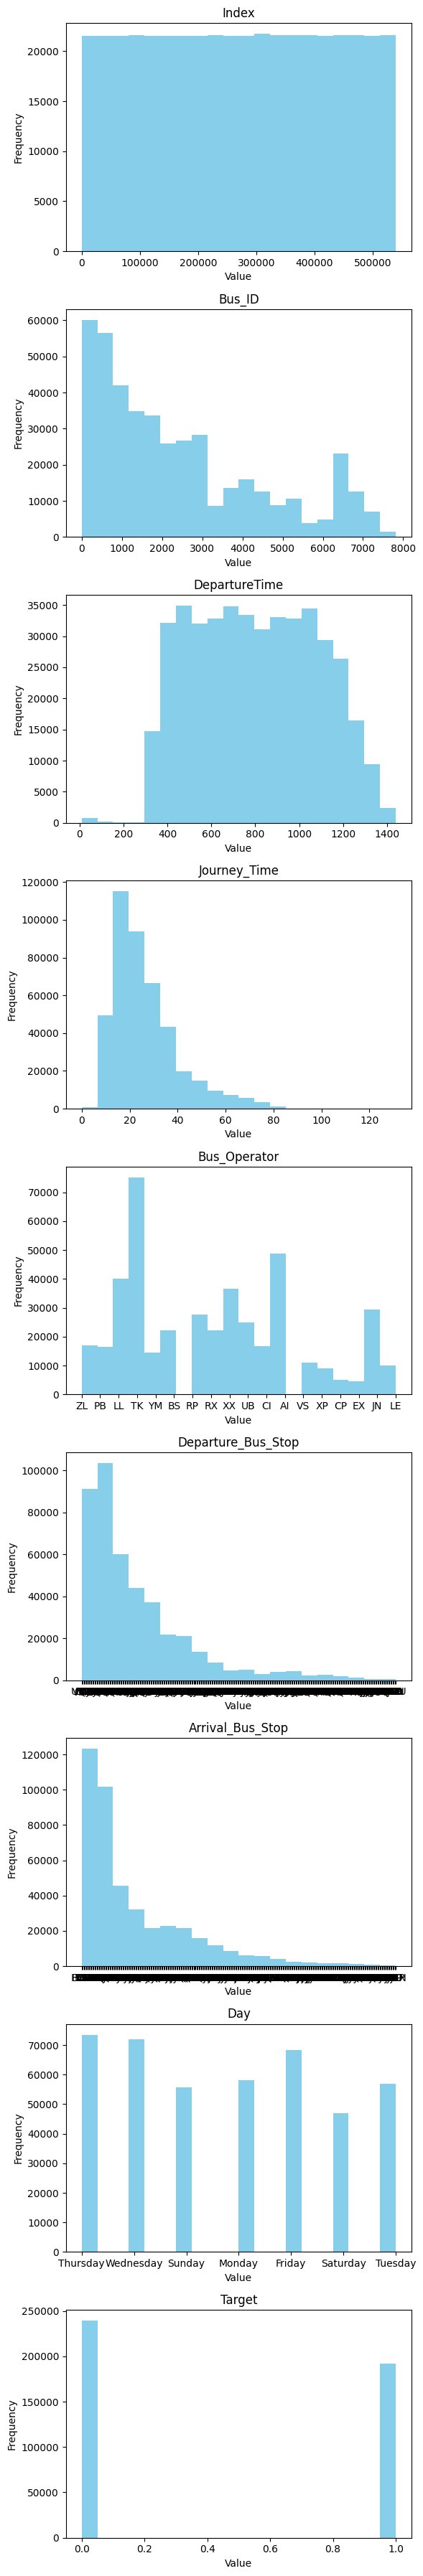

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset into a DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset
df = dataset

# Get the list of column names in the DataFrame
column_names = df.columns

# Set the number of bins for the histograms
num_bins = 20

# Create a figure and axis for the subplots
fig, axes = plt.subplots(len(column_names), 1, figsize=(6, 4 * len(column_names)))

# Plot histograms for each column
for i, col in enumerate(column_names):
    ax = axes[i]
    ax.hist(df[col], bins=num_bins, color='skyblue')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Display the histograms
plt.show()


<ipython-input-118-d2f7df04a648>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


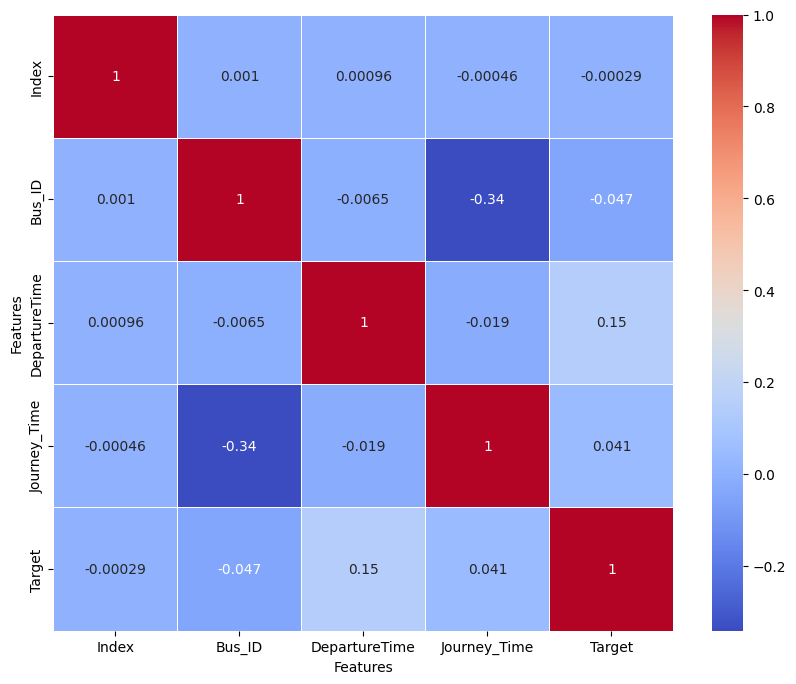

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset into a DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset
df = dataset

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add labels to the axes (optional)
plt.xlabel("Features")
plt.ylabel("Features")

# Show the correlation heatmap
plt.show()

In [ ]:
modes = df.groupby('Bus_ID')['Day'].agg(lambda x: x.value_counts().index[0])
modes

Bus_ID
1        Thursday
2        Thursday
3        Thursday
4          Monday
5        Thursday
          ...    
7810       Monday
7811       Friday
7812    Wednesday
7813    Wednesday
7814       Sunday
Name: Day, Length: 6581, dtype: object

#Logistic regression

In [ ]:
# model = LogisticRegression()
# model.fit(X,Y)
# y_pred = model.predict(test_data)
# pred_df = pd.concat([index_test,pd.Series(y_pred,name='Target')],axis=1)

# pred_df.to_csv('pred.csv',index=False)
# pred_df

#Knn

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=6)

# knn.fit(X,Y)
# y_pred = knn.predict(test_data)
# pred_df = pd.DataFrame({'Index':test_data[:,0],'Target':y_pred})
# pred_df.to_csv('pred.csv',index=False)

#Random forest classification

In [ ]:
# n_estimators = [260,280,300]

# max_features = [0.2,0.6,1]

# max_samples = [0.5,0.75,1]

# min_samples_split = [2,5]



In [ ]:
# param_grid = {
#     'n_estiamtors':n_estimators,
#     'max_features':max_features,
#     'max_samples':max_samples,
#     'min_samples_split':min_samples_split
# }

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# clf = RandomForestClassifier()
# rf_grid = GridSearchCV(estimator=clf,
#                        param_grid = param_grid,
#                        cv = 5,
#                        verbose = 2,
#                        n_jobs = -1)
# clf.fit(X,Y.values.ravel())
# y_pred = clf.predict(test_data)
# test_id = test_data['Index']
# pred_df = pd.concat([test_id,pd.Series(y_pred,name='Target')],axis=1)

# pred_df.to_csv('pred.csv',index=False)

#Xg boost

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier()

param_grid = {
    'max_depth': [8],
    'learning_rate': [0.1],
    'n_estimators': [385],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X, Y)
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters

best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X, Y)

# Make predictions on the test set
y_pred = best_xgb_model.predict(test_data)
test_id = test_data['Index']
pred_df = pd.concat([test_id,pd.Series(y_pred,name='Target')],axis=1)

# pred_df = pd.DataFrame({'Index':t[:,0],'Target':y_pred})

pred_df.to_csv('pred.csv',index=False)
pred_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 385}


,Index,Target
0,301196,0
1,116730,0
2,133420,0
3,120024,1
4,323948,1
...,...,...
107872,538493,0
107873,479701,0
107874,360982,1
107875,423397,0


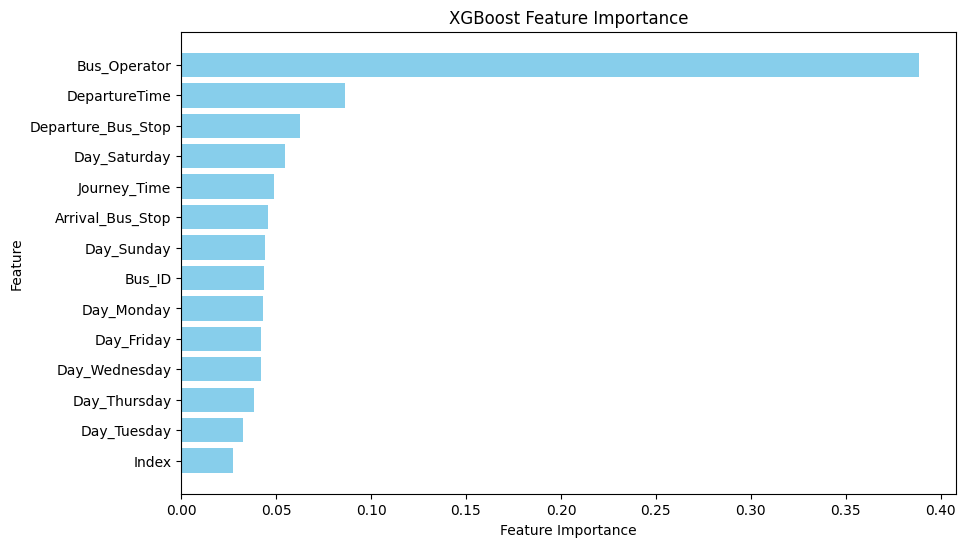

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train your XGBoost model
# Replace the following lines with your actual data loading and model training
# X_train, y_train = load_training_data()
# model = xgb.XGBClassifier()
# model.fit(X_train, y_train)

model = best_xgb_model

# If you have a trained XGBoost model, you can get the feature importance scores
importance_scores = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()
